In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

# 1. Градиентный спуск с постоянным шагом

In [352]:
alpha = 1
beta = 20
def f1(x, y):
    return alpha * (x + 10) ** 2 + beta * (y + 10) ** 2

def grad(x, y):
    return [2 * alpha * (x  + 10), 2 * beta * (y + 10)]

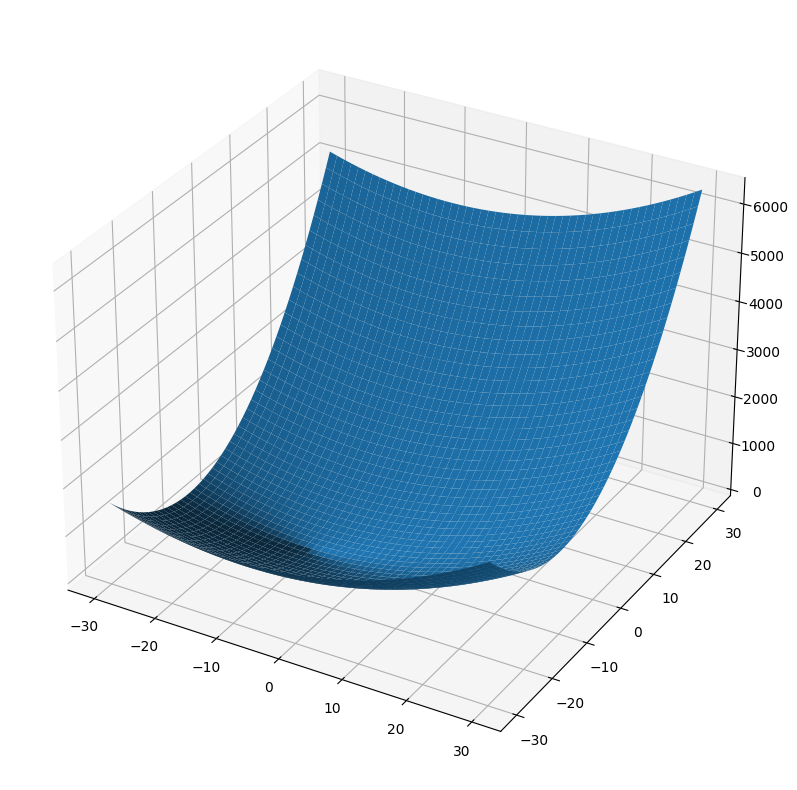

In [238]:
t = np.linspace(-30, 30, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f1(X, Y))

In [371]:
def gradient_descent(f, grad, x, eps = 0.01, lr=0.01):
  points = []
  points.append(x)
  grad_cnt = 0
  while True:
      x = x - lr * np.array(grad(x[0], x[1]))
      if np.linalg.norm(x - points[-1]) < eps:
        break
      points.append(x)
      grad_cnt += 1

  points = np.array(points)
  print(grad_cnt)
  print(x)
  plt.plot(points[:, 0], points[:, 1], 'o-')
  plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))

295
[-10.48047634 -10.        ]


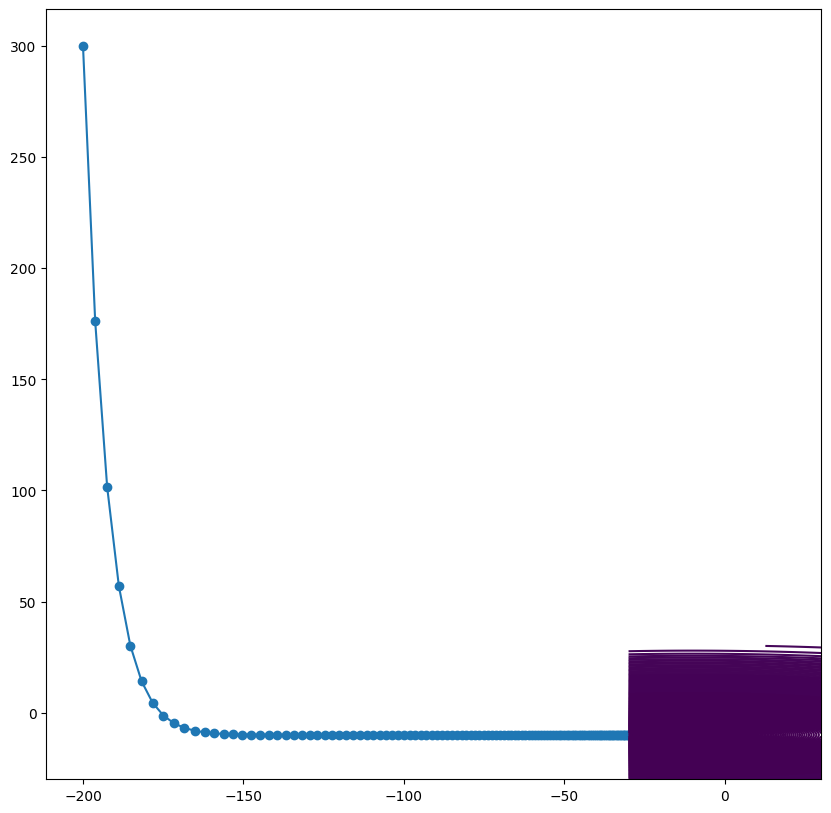

In [377]:
gradient_descent(f1, grad, [-200, 300])

# 2. Метод дихотомии 


In [242]:
def f2(x, y):
  return alpha*(x+10)**2 + beta*(y+10)**2

def grad_f2(x, y):
  return [2 * alpha * (x+10), 2 * beta * (y+10)]

In [373]:
def dichotomy_method(f, grad, current, res_eps, eps):
  func_cnt = 0
  grad_cnt = 0
  points = []
  current = np.asarray(current)
  points.append(current)

  while True:
    grad_cnt += 1
    gradient = np.array(grad(current[0], current[1]))
    interval = [current, current - gradient]
    gradient /= np.linalg.norm(gradient)
    a, b = interval[0], interval[1]
    x = (a + b) / 2
    while np.linalg.norm(b - a) > eps:
      left = x + eps * gradient
      right = x - eps * gradient
      func_cnt += 2
      f1, f2 = f(left[0], left[1]), f(right[0], right[1])
      if f1 < f2:
        b = x
      else:
        a = x
      print(a, b)
      x = (a + b) / 2
    points.append(x)
    if np.linalg.norm(current - x) < res_eps:
      break
    current = x

  print("Gradient calculation count: ", grad_cnt)
  print("Function calculation count: ", func_cnt)
  points = np.array(points)
  print(points)
  plt.plot(points[:, 0], points[:, 1], 'o-')
  plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))

[0. 0.] [ -10. -200.]
[0. 0.] [  -5. -100.]
[0. 0.] [ -2.5 -50. ]
[0. 0.] [ -1.25 -25.  ]
[0. 0.] [ -0.625 -12.5  ]
[-0.3125 -6.25  ] [ -0.625 -12.5  ]
[-0.46875 -9.375  ] [ -0.625 -12.5  ]
[-0.46875 -9.375  ] [ -0.546875 -10.9375  ]
[-0.46875 -9.375  ] [ -0.5078125 -10.15625  ]
[-0.48828125 -9.765625  ] [ -0.5078125 -10.15625  ]
[-0.49804688 -9.9609375 ] [ -0.5078125 -10.15625  ]
[-0.49804688 -9.9609375 ] [ -0.50292969 -10.05859375]
[ -0.50048828 -10.00976562] [ -0.50292969 -10.05859375]
[ -0.50048828 -10.00976562] [ -0.50170898 -10.03417969]
[ -0.50109863 -10.02197266] [ -0.50170898 -10.03417969]
[ -0.50109863 -10.02197266] [ -0.50140381 -10.02807617]
[ -0.50125122 -10.02502441] [-10.          -9.52453613]
[-5.25062561 -9.77478027] [-10.          -9.52453613]
[-7.62531281 -9.6496582 ] [-10.          -9.52453613]
[-8.8126564  -9.58709717] [-10.          -9.52453613]
[-9.4063282  -9.55581665] [-10.          -9.52453613]
[-9.4063282  -9.55581665] [-9.7031641  -9.54017639]
[-9.4063282  -

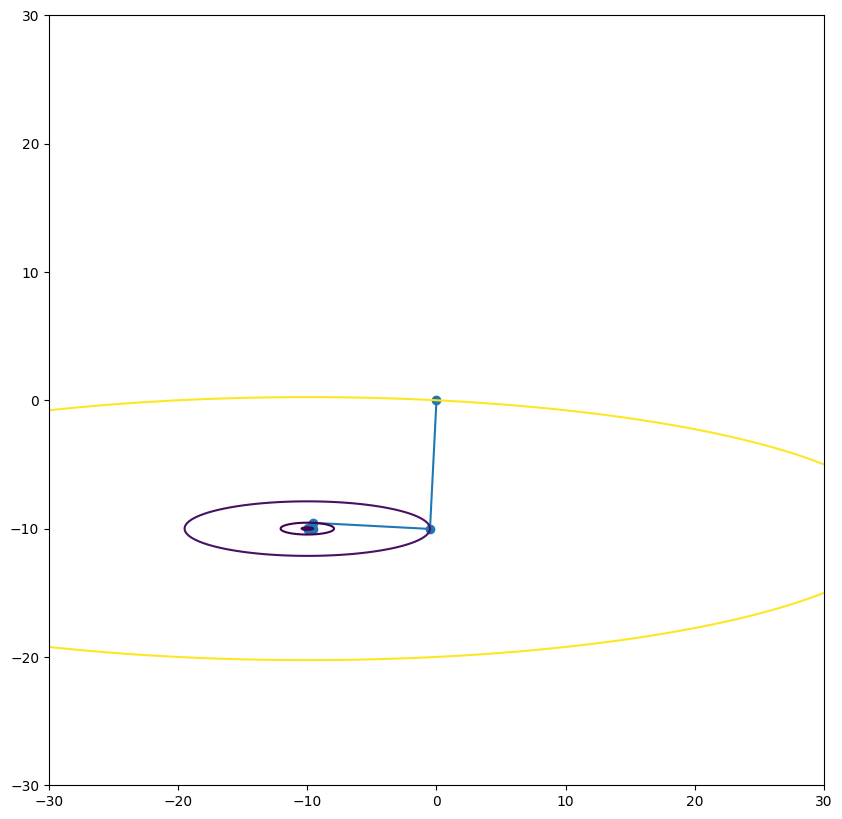

In [380]:
dichotomy_method(f2, grad_f2, [0.0, 0.0], 0.01, 0.01)

# 5. Генератор случайных квадратичных функций

In [ ]:
def generate_matrix(n, k):
  k = k ** 0.5
  A = 10 * np.random.rand(n, n)
  U, s, V = np.linalg.svd(A) #svd decomposition
  max_l = 10 * np.random.rand()
  min_l = max_l / k
  s = np.random.uniform(low=min_l, high=max_l, size=n)
  s[0] = min_l
  s[n - 1] = max_l
  S = np.diag(s)
  A = U.dot(S).dot(V.T)
  A = A.T.dot(A) # positive-semidefinite
  return A


def quadratic_function(n, k):
  A = generate_matrix(n, k)
  return lambda x: np.array(x).dot(A).dot(x), lambda x: 2 * A.dot(x)  

print(np.linalg.cond(generate_matrix(2, 100)))
func, gr = quadratic_function(2, 2)
print(func([0, 0]))
print(gr([1, 2]))

100.00000000000063
0.0
[ 8.63467815 14.19789843]


N-мерный градиентный спуск

In [ ]:
def gradient_descent(n, f, grad, eps=1e-3, lr=0.01):
  start = np.full(n, 10)
  zeros = np.zeros(n)
  prev_x = start
  cur_x = prev_x - lr * np.array(grad(prev_x))
  c = 1
  while abs(f(prev_x) - f(cur_x)) > eps:
    prev_x = cur_x
    cur_x = prev_x - lr * np.array(grad(prev_x))
    c += 1
  return c

17


In [ ]:
X, Y = np.arange(2, 1001), np.arange(2, 1001)
for n in X:
  av = 0
  for i in range(500):
    f, g = quadratic_function(n, 2)
    av += gradient_descent(n, f, g)
  Y[n - 2] = av / 500

Text(0, 0.5, 'Number of steps')

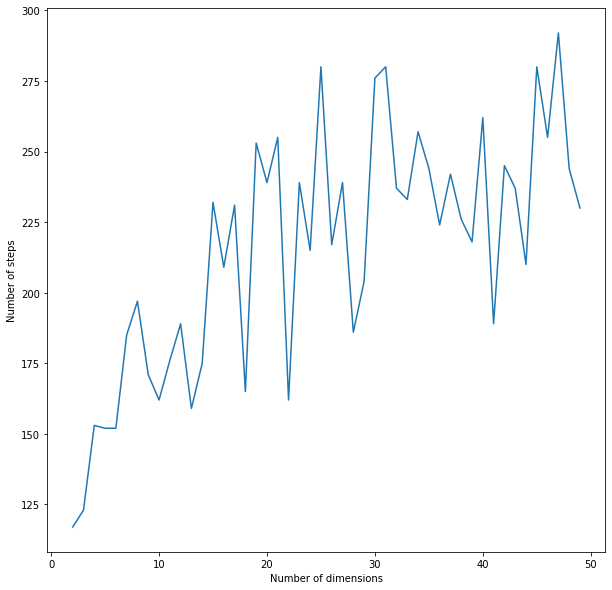

In [ ]:
  plt.plot(X, Y)
  plt.xlabel("Number of dimensions")
  plt.ylabel("Number of steps")

In [ ]:
X, Y = np.arange(1, 1001), np.arange(1, 1001)
for k in X:
  av = 0
  for i in range(500):
    f, g = quadratic_function(2, k)
    av += gradient_descent(2, f, g)
  Y[n - 1] = av / 500

In [ ]:
  plt.plot(X, Y)
  plt.xlabel("Conditional number")
  plt.ylabel("Number of steps")